# Challenge 03 Cleaning data

Se requiere diagnosticar problemas del archivo airbnb.csv haciendo un análisis para después poder limpiar los datos y tener información con la que se pueda trabajar.


### Importar librerias

In [139]:
import pandas as pd

### Importar archivo

In [140]:
file = 'data/airbnb.csv'

data= pd.read_csv(file, sep= ',')

data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


### Diagnóstico

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   coordinates         10019 non-null  object 
 7   room_type           10019 non-null  object 
 8   price               9781 non-null   object 
 9   number_of_reviews   10019 non-null  int64  
 10  last_review         7944 non-null   object 
 11  reviews_per_month   7944 non-null   float64
 12  availability_365    10019 non-null  int64  
 13  rating              7944 non-null   float64
 14  number_of_stays     7944 non-null   float64
 15  5_stars             7944 non-null   float64
 16  list

#### Vamos a eliminar el "and" de la columna coordenadas a separarlas por latitud y longitud y convertirlas a float


In [142]:
# Reemplaza "and" con una coma en la columna de coordenadas
data['coordinates'] = data['coordinates'].str.replace(' and ', ',')

# Divide la columna 'coordinates' en 'latitude' y 'longitude'
data[['latitude', 'longitude']] = data['coordinates'].str.strip('()').str.split(', ', expand=True)

# Convierte las columnas 'latitude' y 'longitude' en tipos float
data['latitude'] = data['latitude'].astype(float)
data['longitude'] = data['longitude'].astype(float)

# Elimina la columna 'coordinates'
data.drop('coordinates', axis=1, inplace=True)

# Muestra el DataFrame resultante
print(data)

       Unnamed: 0  listing_id  \
0               0    13740704   
1               1    22005115   
2               2    21667615   
3               3     6425850   
4               4    22986519   
...           ...         ...   
10014       10014    22307861   
10015       10015      953275   
10016       10016     3452835   
10017       10017    23540194   
10018       10018    32876011   

                                                    name    host_id host_name  \
0      Cozy,budget friendly, cable inc, private entra...   20583125    Michel   
1                  Two floor apartment near Central Park   82746113   Cecilia   
2                      Beautiful 1BR in Brooklyn Heights      78251    Leslie   
3                              Spacious, charming studio   32715865    Yelena   
4                  Bedroom on the lively Lower East Side  154262349    Brooke   
...                                                  ...        ...       ...   
10014                        Lovely 

### Ahora de la columna precio vamos a remover el símbolo de precio y convertirlo en un dato tipo float

In [143]:
# Elimina el símbolo '$' y las comas de la columna 'price' y convierte en float
data['price'] = data['price'].replace('[\$,]', '', regex=True).astype(float)

# Calcula el promedio de la columna 'price'
promedio_precio = data['price'].mean()

# Muestra el promedio de la columna 'price'
print(f"El promedio de la columna 'price' es: ${promedio_precio:.2f}\n")
data.info()

El promedio de la columna 'price' es: $150.91

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10019 non-null  int64  
 1   listing_id          10019 non-null  int64  
 2   name                10014 non-null  object 
 3   host_id             10019 non-null  int64  
 4   host_name           10017 non-null  object 
 5   neighbourhood_full  10019 non-null  object 
 6   room_type           10019 non-null  object 
 7   price               9781 non-null   float64
 8   number_of_reviews   10019 non-null  int64  
 9   last_review         7944 non-null   object 
 10  reviews_per_month   7944 non-null   float64
 11  availability_365    10019 non-null  int64  
 12  rating              7944 non-null   float64
 13  number_of_stays     7944 non-null   float64
 14  5_stars             7944 non-null   float64
 15  listin

### Para convertir las columnas 'listing_added' y 'last_review' a tipos de datos datetime, se usa la función pd.to_datetime()

In [144]:
# Convierte las columnas 'listing_added' y 'last_review' a tipos de datos datetime
data['listing_added'] = pd.to_datetime(data['listing_added'])
data['last_review'] = pd.to_datetime(data['last_review'])

data.info()
# Muestra el DataFrame resultante
data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10019 entries, 0 to 10018
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          10019 non-null  int64         
 1   listing_id          10019 non-null  int64         
 2   name                10014 non-null  object        
 3   host_id             10019 non-null  int64         
 4   host_name           10017 non-null  object        
 5   neighbourhood_full  10019 non-null  object        
 6   room_type           10019 non-null  object        
 7   price               9781 non-null   float64       
 8   number_of_reviews   10019 non-null  int64         
 9   last_review         7944 non-null   datetime64[ns]
 10  reviews_per_month   7944 non-null   float64       
 11  availability_365    10019 non-null  int64         
 12  rating              7944 non-null   float64       
 13  number_of_stays     7944 non-null   float64   

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire home/apt,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire home/apt,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire home/apt,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"Manhattan, Harlem",Entire home/apt,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257
10015,10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"Manhattan, East Harlem",Entire home/apt,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330
10016,10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"Brooklyn, Clinton Hill",Entire home/apt,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743
10017,10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"Brooklyn, Clinton Hill",Entire home/apt,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366


### Checando la consistencia del dataframe

#### Se verifican los valores unicos en las columnas con nuniuqe()

In [145]:
# Verificar valores únicos en cada columna
data.nunique()

Unnamed: 0            10019
listing_id             9999
name                   9919
host_id                8921
host_name              4084
neighbourhood_full      198
room_type                 7
price                   433
number_of_reviews       271
last_review            1222
reviews_per_month       683
availability_365        366
rating                 7929
number_of_stays         270
5_stars                7928
listing_added          1235
latitude               7693
longitude              6769
dtype: int64

#### Se comparan las columnas listing_added y last_review porque no puede haber reseñas antes de registrarse en la plataforma

In [146]:
inconsistent_dates = data[data['listing_added'] > data['last_review']]
inconsistent_dates

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354
50,50,20783900,Marvelous Manhattan Marble Hill Private Suites,148960265,Randy,"Manhattan, Marble Hill",Private room,93.0,7,2018-10-06,0.32,0,4.868036,8.4,0.609263,2020-02-17,40.87618,-73.91266
60,60,1908852,Oversized Studio By Columbus Circle,684629,Alana,"Manhattan, Upper West Side",Entire home/apt,189.0,7,2016-05-06,0.13,0,4.841204,8.4,0.725995,2017-09-17,40.77060,-73.98919
124,124,28659894,Private bedroom in prime Bushwick! Near Trains!!!,216235179,Nina,"Brooklyn, Bushwick",Private room,55.0,4,2019-04-12,0.58,358,4.916252,4.8,0.703117,2020-08-23,40.69988,-73.92072
511,511,33619855,Modern & Spacious in trendy Crown Heights,253354074,Yehudis,"Brooklyn, Crown Heights",home,150.0,6,2019-05-27,2.50,148,3.462432,7.2,0.610929,2020-10-07,40.66387,-73.93840
521,521,25317793,Awesome Cozy Room in The Heart of Sunnyside!,136406167,Kara,"Queens, Sunnyside",Private room,65.0,22,2019-06-11,1.63,131,4.442485,26.4,0.722388,2020-10-22,40.74090,-73.92696


####  Se imprimen los valores únicos para el tipo de cuarto

In [147]:
#Imprimir valores únicos en la columna 'room_type'
unique_room_types = data['room_type'].unique()
print(unique_room_types)

['Private room' 'Entire home/apt' 'Private' 'Shared room' 'PRIVATE ROOM'
 'home' '   Shared room      ']


#### Se tratan las mayúsculas y los espacios en blanco de la columna de tipo de cuarto con los métodos str.strip() y str.lower()

In [148]:
data['room_type'] = data['room_type'].str.strip().str.lower()

unique_room_types = data['room_type'].unique()
print(unique_room_types)

['private room' 'entire home/apt' 'private' 'shared room' 'home']


#### Generamos un nuevo dataframe por si nos equivocamos en algún paso del proceso

In [149]:
data_2 = data.to_csv('nuevo_archivo.csv', index=False)

#### Se reemplazan los tipo de cuarto por Shared room, Entire place, Private room y Hotel room

In [150]:
# Mapea los valores de 'room_type' a las categorías deseadas
room_type_mapping = {
    'shared room': 'Shared room',
    'entire home/apt': 'Entire place',
    'home': 'Entire place',
    'private room': 'Private room',
    'private': 'Hotel room'  # Asegúrate de que esta categoría sea correcta en tus datos
}

# Mapea 'home' y 'entire home/apt' como 'Entire place'
#data['room_type'] = data['room_type'].str.replace('home', 'Entire place')
data['room_type'] = data['room_type'].map(room_type_mapping)

# Imprime los valores únicos en la columna 'room_type' después de la modificación
unique_room_types = data['room_type'].unique()
print(unique_room_types)


['Private room' 'Entire place' 'Hotel room' 'Shared room']


#### En la columna neighborhood se separa en dos borough y neighborhood, se eliminan los espacios en blanco y la columna original se elimina

In [151]:
# Divide la columna 'neighbourhood_full' en 'borough' y 'neighbourhood'
data[['borough', 'neighbourhood']] = data['neighbourhood_full'].str.split(',', 1, expand=True)

# Limpia los valores en las nuevas columnas
data['borough'] = data['borough'].str.strip()
data['neighbourhood'] = data['neighbourhood'].str.strip()

# Elimina la columna 'neighbourhood_full'
data.drop('neighbourhood_full', axis=1, inplace=True)

# Imprime los valores únicos de 'borough' y 'neighbourhood'
unique_boroughs = data['borough'].unique()
unique_neighbourhoods = data['neighbourhood'].unique()
print("Valores únicos de 'borough':")
print(unique_boroughs)
print("\nValores únicos de 'neighbourhood':")
print(unique_neighbourhoods)

data

Valores únicos de 'borough':
['Brooklyn' 'Manhattan' 'Queens' 'Bronx' 'Staten Island']

Valores únicos de 'neighbourhood':
['Flatlands' 'Upper West Side' 'Brooklyn Heights' 'Lower East Side'
 'Greenwich Village' 'Harlem' 'Sheepshead Bay' 'Theater District'
 'Bushwick' 'Laurelton' 'Mott Haven' 'Flushing' 'Crown Heights' 'Midtown'
 'Financial District' 'East Village' 'Park Slope' 'Washington Heights'
 'Williamsburg' 'Chelsea' 'Bedford-Stuyvesant' 'Gowanus' 'Upper East Side'
 'Ditmars Steinway' 'Cypress Hills' "Hell's Kitchen" 'Ridgewood'
 'Marble Hill' 'Kips Bay' 'Prospect Heights' 'East New York' 'Concord'
 'Stapleton' 'Astoria' 'East Harlem' 'Sunnyside' 'Gramercy'
 'Prospect-Lefferts Gardens' 'Sunset Park' 'Forest Hills'
 'Windsor Terrace' 'Clinton Hill' 'Murray Hill' 'Flatiron District'
 'Greenpoint' 'East Flatbush' 'Tribeca' 'Woodhaven' 'Fort Greene' 'Inwood'
 'Chinatown' 'Rockaway Beach' 'Woodside' 'Bayside' 'Bensonhurst' 'SoHo'
 'Red Hook' 'West Village' 'South Slope' 'Richmond Hil

,Unnamed: 0,listing_id,name,host_id,host_name,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,borough,neighbourhood
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,Private room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,Brooklyn,Flatlands
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,Manhattan,Upper West Side
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,Entire place,150.0,0,NaT,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517,Brooklyn,Brooklyn Heights
3,3,6425850,"Spacious, charming studio",32715865,Yelena,Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,Manhattan,Upper West Side
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,Private room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,Manhattan,Lower East Side
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,Entire place,105.0,4,2018-05-28,0.21,0,4.757555,4.8,0.639223,2017-11-22,40.80379,-73.95257,Manhattan,Harlem
10015,10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,Entire place,125.0,50,2018-05-06,0.66,188,4.344704,60.0,0.648778,2017-10-31,40.79531,-73.93330,Manhattan,East Harlem
10016,10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,Entire place,100.0,45,2016-11-27,0.98,0,3.966214,54.0,0.631713,2016-05-24,40.68266,-73.96743,Brooklyn,Clinton Hill
10017,10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,Entire place,450.0,2,2019-05-31,0.17,99,4.078581,2.4,0.703360,2018-11-25,40.68832,-73.96366,Brooklyn,Clinton Hill


#### Se ajustan los valores fuera de rango de la columna rating y se eliminan las filas con un rating mayor al rango permitido

In [152]:
# Verificar el valor máximo actual de la columna 'rating'
max_rating = data['rating'].max()

# Definir el valor máximo deseado (por ejemplo, 5.0)
max_rating_deseado = 5.0

# Aislar filas con 'rating' > 5.0
out_of_range_rows = data[data['rating'] > max_rating_deseado]

# Eliminar las filas fuera de rango
data.drop(out_of_range_rows.index, inplace=True)

#### Se visualiza la información de la columna rating con un histograma usando Seaborn

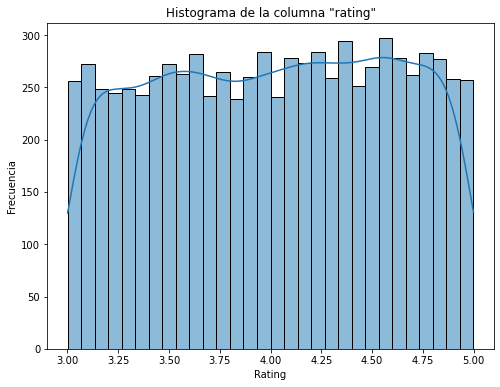

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar el histograma de la columna 'rating'
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=30, kde=True)
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Histograma de la columna "rating"')
plt.show()

#### Hechas las correciones se obtiene el nuevo valor máximo

In [154]:
# Obtener el nuevo valor máximo de la columna 'rating'
nuevo_max_rating = data['rating'].max()
print(f"Nuevo valor máximo de la columna 'rating': {nuevo_max_rating}")

Nuevo valor máximo de la columna 'rating': 4.999561104773598


### Datos duplicados

#### Se encuentran duplicados con el método duplicated()

In [155]:
duplicates = data.duplicated()

print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
10014    False
10015    False
10016    False
10017    False
10018    False
Length: 10016, dtype: bool


#### Se encuentran los duplicados no identicos con duplicated() con la opción keen=False

In [156]:
non_identical_duplicates = data[data.duplicated(keep=False)]

print(non_identical_duplicates)

Empty DataFrame
Columns: [Unnamed: 0, listing_id, name, host_id, host_name, room_type, price, number_of_reviews, last_review, reviews_per_month, availability_365, rating, number_of_stays, 5_stars, listing_added, latitude, longitude, borough, neighbourhood]
Index: []


#### Se muestran todos los duplicados

In [157]:
all_duplicates = pd.concat([data[duplicates], non_identical_duplicates])

print(all_duplicates)

Empty DataFrame
Columns: [Unnamed: 0, listing_id, name, host_id, host_name, room_type, price, number_of_reviews, last_review, reviews_per_month, availability_365, rating, number_of_stays, 5_stars, listing_added, latitude, longitude, borough, neighbourhood]
Index: []


#### Para eliminar los duplicados idénticos se usa el método drop_duplicates()

In [158]:
data_no_identical_duplicates = data.drop_duplicates()

print(data_no_identical_duplicates)

       Unnamed: 0  listing_id  \
0               0    13740704   
1               1    22005115   
2               2    21667615   
3               3     6425850   
4               4    22986519   
...           ...         ...   
10014       10014    22307861   
10015       10015      953275   
10016       10016     3452835   
10017       10017    23540194   
10018       10018    32876011   

                                                    name    host_id host_name  \
0      Cozy,budget friendly, cable inc, private entra...   20583125    Michel   
1                  Two floor apartment near Central Park   82746113   Cecilia   
2                      Beautiful 1BR in Brooklyn Heights      78251    Leslie   
3                              Spacious, charming studio   32715865    Yelena   
4                  Bedroom on the lively Lower East Side  154262349    Brooke   
...                                                  ...        ...       ...   
10014                        Lovely 